In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/colors.csv')

In [4]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


<img src="assets/bricks.jpg">

In [5]:
# how many different colors
x = df['name'].nunique()
print(f'There are {x} different colors')

There are 135 different colors


In [6]:
df.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

In [7]:
#how many colors are transparent
df.groupby(by='is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
# same thing with value_counts
df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

# **Understanding LEGO Themes vs. LEGO sets**
<img src="assets/lego_themes.png">

## A lego set is blah blah blah, LEGO sets great fun blah blah ha
<img src="assets/lego_sets.png">

In [9]:
# the .. means go back up one level instead of just starting from the file path start
sets = pd.read_csv('../data/sets.csv')

In [10]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [11]:
# oldest lego sets
sets.sort_values(by='year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [12]:
sets.groupby(by='year').count()


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [13]:
sets.year.value_counts().sort_values()

1960      3
2021      3
1953      4
1959      4
1949      5
       ... 
2016    757
2015    774
2017    786
2018    816
2019    840
Name: year, Length: 71, dtype: int64

In [14]:
# find the sets with the most parts, holy shit lol
sets.sort_values(by='num_parts',ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
1782,20216-1,MBA Robot & Micro Designer (Kits 2 - 3 Redesign),2013,432,0
1780,20214-1,MBA Adventure Designer (Kits 7 - 9 Redesign),2013,432,0
6822,5005539-1,Brick Pouch (Yellow),2018,501,0
9026,66319-1,Power Miners 3 in 1 Superpack,2009,439,0


In [15]:
import matplotlib.pyplot as plt

In [16]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [17]:
# create a. series this way
sets_by_year = pd.Series(data=sets.year.value_counts(), index=sets.year.unique())

In [18]:
sets_by_year.sort_values(ascending=True,inplace=True)

In [19]:
sets_by_year.sort_values(axis='index',ascending=False)

2019    840
2018    816
2017    786
2015    774
2016    757
       ... 
1949      5
1959      4
1953      4
1960      3
2021      3
Name: year, Length: 71, dtype: int64

In [20]:
sets_by_year.name
s = sets_by_year

In [21]:
# another way to creat a series and just using one column (set_num) as the count
sets2 = sets.groupby('year').count()
sets2

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


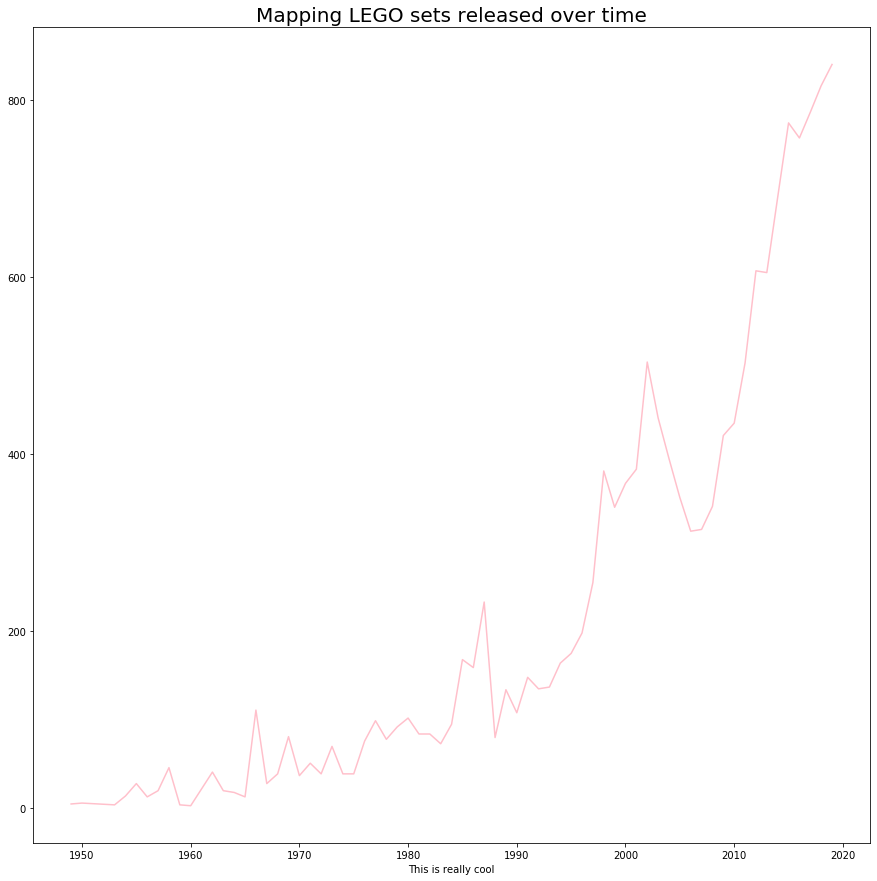

In [22]:
# the index splicing allows you to exclude the last two entries
plt.figure(figsize=(15,15))
plt.xlabel('This is really cool')
plt.title('Mapping LEGO sets released over time',fontsize=20)
plt.plot(sets2.index[:-2],sets2.set_num[:-2],color='pink')

In [23]:
sets.year.value_counts().sort_values()

1960      3
2021      3
1953      4
1959      4
1949      5
       ... 
2016    757
2015    774
2017    786
2018    816
2019    840
Name: year, Length: 71, dtype: int64

In [25]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [29]:
themes_by_year = sets.groupby(by='year').agg({'theme_id':pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


### This is a good explanation of the Agg function
<img src="../assets/faq.png">

In [36]:
# convert one column to another name
themes_by_year.rename(columns={'theme_id':'themes'},inplace=True)
themes_by_year.head()

,themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


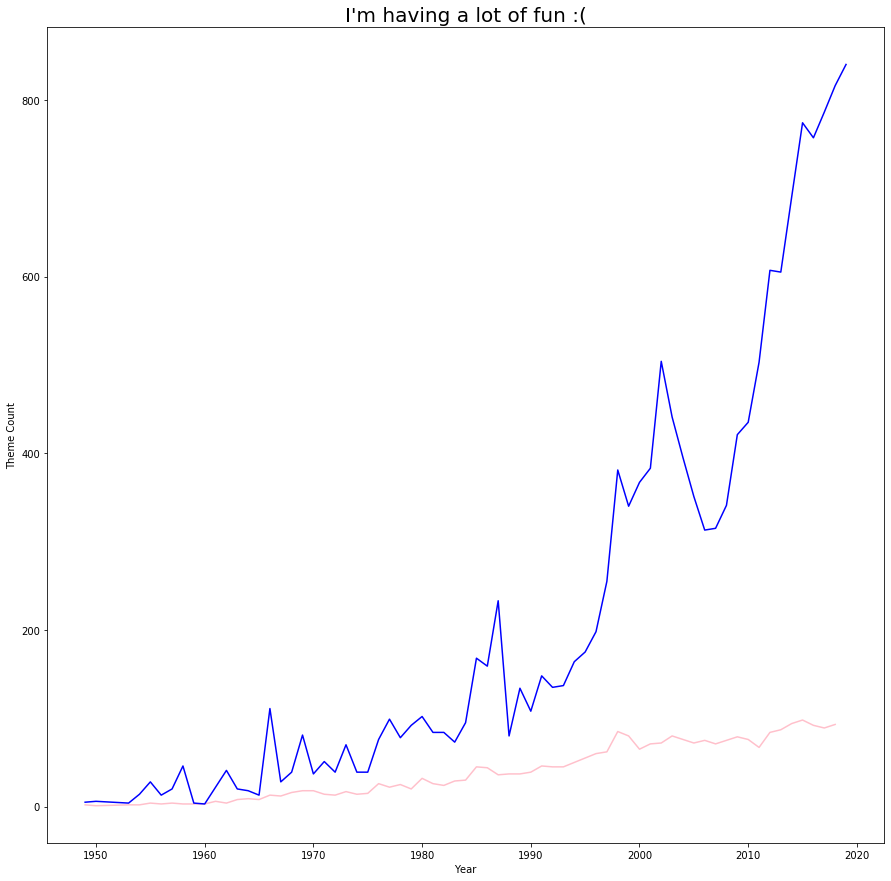

In [48]:
plt.figure(figsize=(15,15))
plt.xlabel('Year')
plt.ylabel('Theme Count')
plt.title("I'm having a lot of fun :)",fontsize=20)
plt.plot(themes_by_year.index[:-3], themes_by_year['themes'][:-3],color='pink')
#plt.figure(figsize=(15,15))
plt.xlabel('Year')
plt.ylabel('Theme Count')
plt.title("I'm having a lot of fun :(",fontsize=20)
plt.plot(sets2.index[:-2],sets2.set_num[:-2],color='blue')

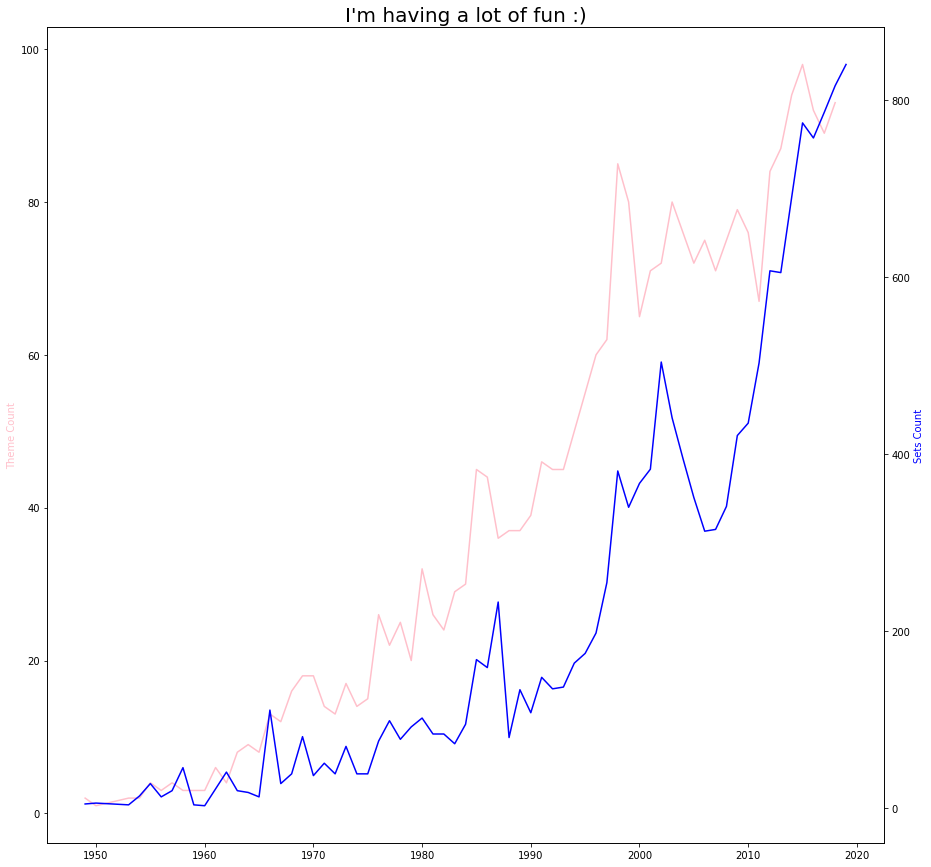

In [56]:
# plotting on two different y axes
# need to create a second axis to get this one to work

plt.figure(figsize=(15,15))


ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

plt.xlabel('Year')
ax1.set_ylabel('Theme Count',color='pink')
ax2.set_ylabel('Sets Count',color='blue')
plt.title("I'm having a lot of fun :)",fontsize=20)


ax1.plot(themes_by_year.index[:-3], themes_by_year['themes'][:-3],color='pink')
ax2.plot(sets2.index[:-2],sets2.set_num[:-2],color='blue')

In [57]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [66]:
parts_per_set = sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [72]:
parts_per_set.rename(columns={'num_parts':"pieces"},inplace=True)
parts_per_set.head()

,pieces
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


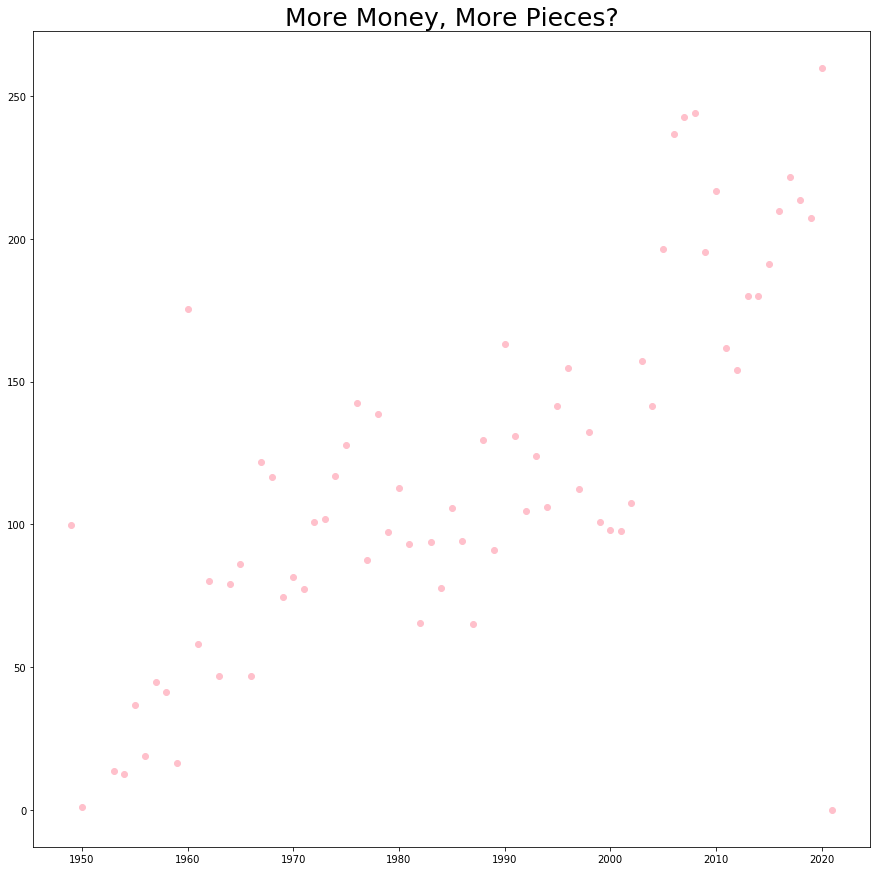

In [77]:
plt.figure(figsize=(15,15))
plt.title('More Money, More Pieces?',fontsize=25)
plt.scatter(parts_per_set.index,parts_per_set.pieces,color='pink')

In [78]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


<img src="assets/rebrickable_schema.png">

In [86]:
# figure out how to join these
themes = pd.read_csv('../data/themes.csv')
themes.head().sort_values(by='name')

,id,name,parent_id
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
0,1,Technic,NaN


In [87]:
themes[themes['name']=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [89]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [92]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [93]:
# join them
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values
                               })

In [94]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [96]:
merged = pd.merge(set_theme_count,themes,how='inner',on='id')
merged.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [99]:
merged.drop(columns='parent_id',inplace=True)
merged.head()

,id,set_count,name
0,158,753,Star Wars
1,501,656,Gear
2,494,398,Friends
3,435,356,Ninjago
4,503,329,Key Chain


<BarContainer object of 10 artists>

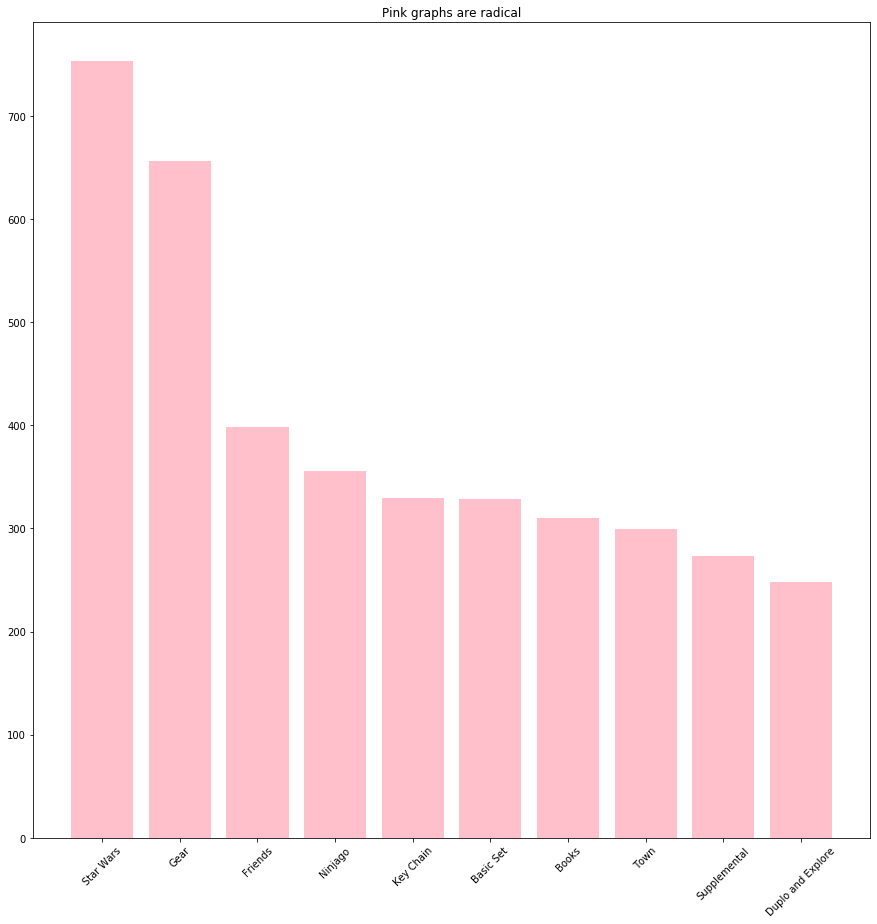

In [107]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
plt.title('Pink graphs are radical')
plt.bar(merged.name[:10],merged.set_count[:10],color='pink')